# 1. Grounding 이해하기

## 1.1 google search

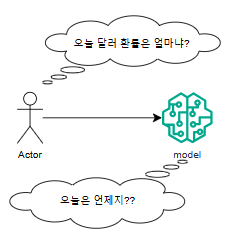

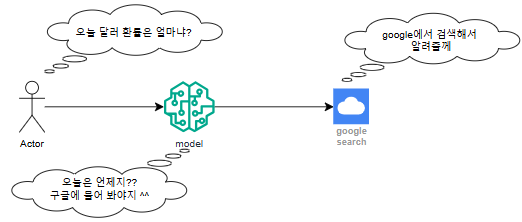

## 1.2 Datastore

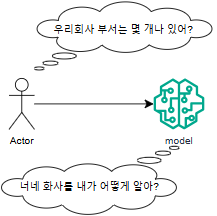

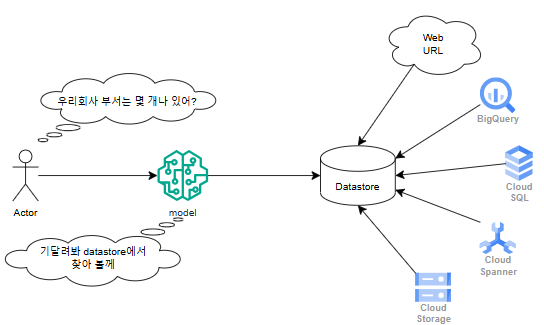

# 2. 코드 이해하기

## 2.1 환경변수 설정

In [ ]:
import vertexai

PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION="us-east1"

vertexai.init(project=PROJECT_ID, location=LOCATION)

## 2.2 모델 생성

In [ ]:
from vertexai.generative_models import(
    GenerativeModel,
    GenerationConfig,
    Tool
)

In [ ]:
MODEL_NAME="gemini-1.5-pro"

In [ ]:
model = GenerativeModel(
    MODEL_NAME,
    generation_config=GenerationConfig(
        temperature=0.0
    )
)

## 2.3 결과 확인

In [ ]:
prompt = "오늘 달러 환률은 얼마야?"
response = model.generate_content(prompt)
print(response.text)

죄송합니다. 실시간 정보를 제공할 수 없습니다. 환율은 끊임없이 변동합니다. 

정확한 오늘 달러 환율을 확인하려면 다음을 추천합니다.

* **네이버, 다음 등 포털 사이트의 환율 정보:** 실시간 환율을 제공합니다.
* **은행 웹사이트 또는 모바일 앱:** 거래 은행의 웹사이트나 앱에서 환율 정보를 확인할 수 있습니다. 
* **금융 정보 제공 웹사이트:** Investing.com, Yahoo Finance 등 금융 정보 제공 웹사이트에서 실시간 환율을 확인할 수 있습니다.

원하시는 정보를 얻으시길 바랍니다! 



## 2.4 Google search 적용

In [ ]:
from vertexai.generative_models import grounding

rag = grounding.GoogleSearchRetrieval()
tool = Tool.from_google_search_retrieval(rag)

model = GenerativeModel(
    MODEL_NAME,
    tools=[tool],
    generation_config=GenerationConfig(
        temperature=0.0
    )
)

In [ ]:
prompt = "오늘 달러 환률은 얼마야?"
response = model.generate_content(prompt)
print(response.text)

오늘 (2025년 1월 16일) 미국 달러 환율은 1,469.00원 입니다. 

